Conor Johnston S1219419  Big Data Landscapes Final Assessments

users of this notebook will need to install facebook prophet library using conda or pip: https://facebook.github.io/prophet/docs/installation.html

Datasets original source url: https://data.world/bhavnachawla/population-fertility-rate-life-expectancy

Question: Can we make predictions on future populations, fertility rates and life expectancies in a selected country and identify which of the three has the greatest increase.


In [327]:

import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

After imports have been declared, we will bring in the raw data and put it into a dataframe, we will do this through the use of the pandas library which has been imported and declared above. The Datasets that have been found for this question are taken directly from the site.

In [328]:
populationData = pd.read_excel('https://query.data.world/s/j2rk7koyqvu5uskdwi77d2zyctx7s5')

In [329]:
fertilityData = pd.read_excel('https://query.data.world/s/mwbzjh2c7ooeuhrhv53luf7vv74o36')

In [330]:
lifeExpectancyData = pd.read_excel('https://query.data.world/s/awprsk7pezwi263ianzjbh72f7iz5b')

In [331]:
print(populationData.shape)
populationData.head(1)

(215, 58)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,...,98742.0,100031.0,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0


In [332]:
print(lifeExpectancyData.shape)
lifeExpectancyData.head(1)

(215, 58)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,...,74.090854,74.228073,74.375707,74.526244,74.67422,74.816146,74.952024,75.08039,75.206756,75.332171


In [333]:
print("Fertility Data info: - ")
print(fertilityData.shape)
fertilityData.head(1)

Fertility Data info: - 
(215, 58)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.82,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.69,1.681,1.673


In [334]:
## initialize the Prophet object this object will be used later to 
## predict values in the future based on current ones and plot them
## to a graph.

p = Prophet()

In [335]:
## using the prophet fit method to analyze the parameters of the specified parameters
##p.fit(populationData)

In [336]:
populationData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [337]:
populationData.drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

In [338]:
populationData.head(5)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,58385.0,...,98742.0,100031.0,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0
1,Andorra,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,19646.0,20755.0,21888.0,...,78337.0,81223.0,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0
2,Afghanistan,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,10148841.0,10368600.0,10599790.0,...,23499850.0,24399948.0,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0
3,Angola,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,5863568.0,5962831.0,6066094.0,...,17295500.0,17912942.0,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0
4,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900489.0,2897366.0


In [339]:
populationData.transpose()
print("success")

success


In [340]:
##manually typing out the code to rename the columns into the needed format is haunting so we will cheat a bit and
##automate it slightly by creating a function that will loop through our preporcessed data columns and create the
##name change using a small application of conditions and string concatonation 

In [341]:

for item, df in populationData.items():
    if item != "Country Name":
        print(item)
        newName = item+'-12-31'
        print(newName)
        populationData.rename(columns = {item:newName}, inplace=True)
        

1960
1960-12-31
1961
1961-12-31
1962
1962-12-31
1963
1963-12-31
1964
1964-12-31
1965
1965-12-31
1966
1966-12-31
1967
1967-12-31
1968
1968-12-31
1969
1969-12-31
1970
1970-12-31
1971
1971-12-31
1972
1972-12-31
1973
1973-12-31
1974
1974-12-31
1975
1975-12-31
1976
1976-12-31
1977
1977-12-31
1978
1978-12-31
1979
1979-12-31
1980
1980-12-31
1981
1981-12-31
1982
1982-12-31
1983
1983-12-31
1984
1984-12-31
1985
1985-12-31
1986
1986-12-31
1987
1987-12-31
1988
1988-12-31
1989
1989-12-31
1990
1990-12-31
1991
1991-12-31
1992
1992-12-31
1993
1993-12-31
1994
1994-12-31
1995
1995-12-31
1996
1996-12-31
1997
1997-12-31
1998
1998-12-31
1999
1999-12-31
2000
2000-12-31
2001
2001-12-31
2002
2002-12-31
2003
2003-12-31
2004
2004-12-31
2005
2005-12-31
2006
2006-12-31
2007
2007-12-31
2008
2008-12-31
2009
2009-12-31
2010
2010-12-31
2011
2011-12-31
2012
2012-12-31
2013
2013-12-31


In [342]:
##outputing the information to show that the names of the columns have been changed to match the necessary date format
##in the form YYYY-MM-DD 
populationData.head(1)

,Country Name,1960-12-31,1961-12-31,1962-12-31,1963-12-31,1964-12-31,1965-12-31,1966-12-31,1967-12-31,1968-12-31,...,2004-12-31,2005-12-31,2006-12-31,2007-12-31,2008-12-31,2009-12-31,2010-12-31,2011-12-31,2012-12-31,2013-12-31
0,Aruba,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,58385.0,...,98742.0,100031.0,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0


With this format achieved it is time to get to the modelling, for this we need to put the data from the datasets in a format that can be read and analysed by facebook prophet to achieve not only our modelling purposes but our prediction purposes as well. We will use Aruba as the Example piece from the dataset for this.

In [343]:
data = []
for year, i in populationData.items():
    if year != "Country Name":
       ## print date.
   
        data.append(year)

print(data)
##df = pd.DataFrame(data, columns = ['Date', 'Population'])

['1960-12-31', '1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31', '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31', '1969-12-31', '1970-12-31', '1971-12-31', '1972-12-31', '1973-12-31', '1974-12-31', '1975-12-31', '1976-12-31', '1977-12-31', '1978-12-31', '1979-12-31', '1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31']


In [344]:
column = populationData
column.drop(["Country Name"], axis=1, inplace=True)




In [345]:
dates = column.columns
print(dates[0])

1960-12-31


In [346]:
population = populationData.iloc[0]
pops= population.iloc[0:]


print(dates.shape)
print(pops.shape)


## Data is the same shape and can now be mapped
##df = pd.DataFrame(val.iloc[1:], columns = ['Date', 'Population'])


(54,)
(54,)


In [347]:
data = []
for x in range(0 , len(value1)):
    data.append([dates[x] , pops.iloc[x]])
print(data)
df = pd.DataFrame(data, columns = ['Date', 'Population'])

[['1960-12-31', 54208.0], ['1961-12-31', 55435.0], ['1962-12-31', 56226.0], ['1963-12-31', 56697.0], ['1964-12-31', 57029.0], ['1965-12-31', 57360.0], ['1966-12-31', 57712.0], ['1967-12-31', 58049.0], ['1968-12-31', 58385.0], ['1969-12-31', 58724.0], ['1970-12-31', 59065.0], ['1971-12-31', 59438.0], ['1972-12-31', 59849.0], ['1973-12-31', 60239.0], ['1974-12-31', 60525.0], ['1975-12-31', 60655.0], ['1976-12-31', 60589.0], ['1977-12-31', 60366.0], ['1978-12-31', 60106.0], ['1979-12-31', 59978.0], ['1980-12-31', 60096.0], ['1981-12-31', 60567.0], ['1982-12-31', 61344.0], ['1983-12-31', 62204.0], ['1984-12-31', 62831.0], ['1985-12-31', 63028.0], ['1986-12-31', 62644.0], ['1987-12-31', 61835.0], ['1988-12-31', 61077.0], ['1989-12-31', 61032.0], ['1990-12-31', 62148.0], ['1991-12-31', 64623.0], ['1992-12-31', 68235.0], ['1993-12-31', 72498.0], ['1994-12-31', 76700.0], ['1995-12-31', 80326.0], ['1996-12-31', 83195.0], ['1997-12-31', 85447.0], ['1998-12-31', 87276.0], ['1999-12-31', 89004.0],

In [348]:
df.head()

,Date,Population
0,1960-12-31,54208.0
1,1961-12-31,55435.0
2,1962-12-31,56226.0
3,1963-12-31,56697.0
4,1964-12-31,57029.0


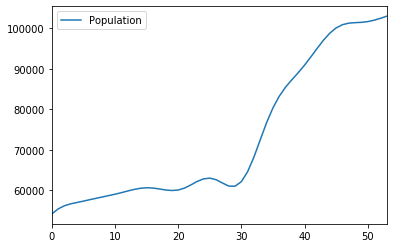

In [349]:
df.plot()

In [350]:
##lets start the prophet model
model = Prophet()

In [351]:
df.columns

Index(['Date', 'Population'], dtype='object')

In [352]:
df.rename(columns={'Date':'ds','Population':'y'}, inplace=True)

In [353]:
df.head()

,ds,y
0,1960-12-31,54208.0
1,1961-12-31,55435.0
2,1962-12-31,56226.0
3,1963-12-31,56697.0
4,1964-12-31,57029.0


In [354]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [355]:
futureYears = model.make_future_dataframe(periods=10,freq='Y')

In [356]:
futureYears.tail(10)

,ds
54,2014-12-31
55,2015-12-31
56,2016-12-31
57,2017-12-31
58,2018-12-31
59,2019-12-31
60,2020-12-31
61,2021-12-31
62,2022-12-31
63,2023-12-31


In [357]:
prediction = model.predict(futureYears)

In [358]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
59,2019-12-31,54556.018255,106134.947208,110750.782181,52597.968721,56639.854205,53844.807430,53844.807430,53844.807430,53844.807430,53844.807430,53844.807430,0.0,0.0,0.0,108400.825685
60,2020-12-31,55262.360766,106081.785080,111869.059563,52622.381735,57935.557419,53686.000756,53686.000756,53686.000756,53686.000756,53686.000756,53686.000756,0.0,0.0,0.0,108948.361522
61,2021-12-31,55966.773379,106337.049652,113393.892355,52624.263575,59189.358043,53772.398789,53772.398789,53772.398789,53772.398789,53772.398789,53772.398789,0.0,0.0,0.0,109739.172168
62,2022-12-31,56671.185992,106453.855894,114703.591033,52629.603463,60679.664283,53825.528176,53825.528176,53825.528176,53825.528176,53825.528176,53825.528176,0.0,0.0,0.0,110496.714168
63,2023-12-31,57375.598605,106322.549577,116058.824111,52640.659841,62098.535357,53844.807430,53844.807430,53844.807430,53844.807430,53844.807430,53844.807430,0.0,0.0,0.0,111220.406036


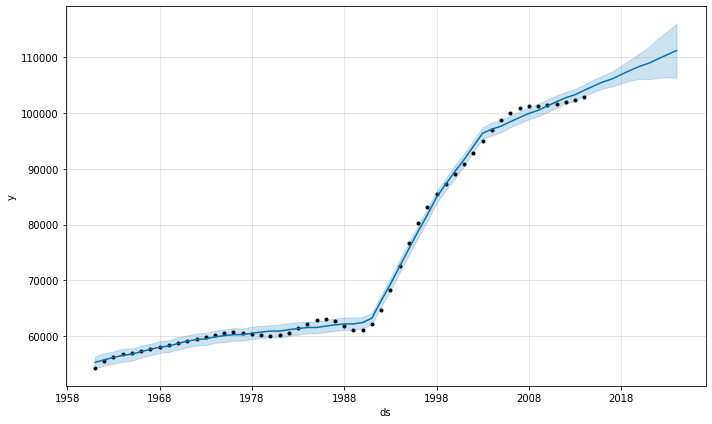

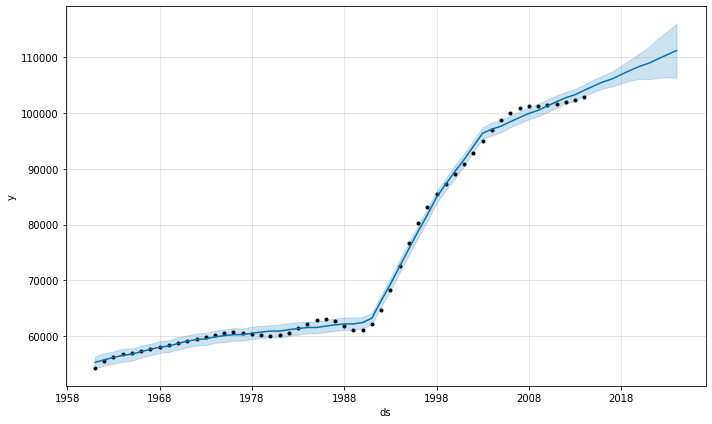

In [359]:
model.plot(prediction)